## DS3021 HW05: 2 Questions from KNN and 1 Question from Visualization (EDA)

**Jolie Ng**

---

**EDA Q1.**

This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [1]:
# Importing Data:
from google.colab import files
uploaded = files.upload()

Saving college_completion.csv to college_completion.csv


In [2]:
# Importing libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Load the dataset:
df = pd.read_csv('college_completion.csv')

In [6]:
# 2. Examine the dataset and its structure:

# Checking dimensions:
print("Dataset dimensions (rows, column):", df.shape)
print ("The first value above represents the number of rows (observations) in the dataset, while the second value above represents the number of columns (variables) in the dataset.\n")

# Show the variable / column names:
print("The variables included are:\n", df.columns)
print("\n")

# Examining first few rows:
print(df.head())

Dataset dimensions (rows, column): (3798, 63)
The first value above represents the number of rows (observations) in the dataset, while the second value above represents the number of columns (variables) in the dataset.

The variables included are:
 Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632




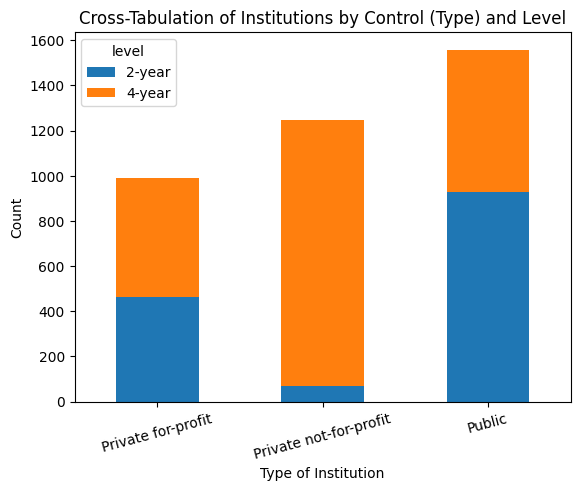

In [16]:
# 3. Cross-tabulate control and level:

cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab)
print("\n")

# Plot graph to show patterns of cross-tabulations:

cross_tab.plot(kind='bar', stacked=True)
plt.title('Cross-Tabulation of Institutions by Control (Type) and Level')
plt.xlabel('Type of Institution')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

From the stacked bar chart, we can see that a significant majority of private not-for-profit institutions are 4-year colleges, while private for-profit and public institutions have a roughly 50-50 split between being a 2-year college and a 4-year college.

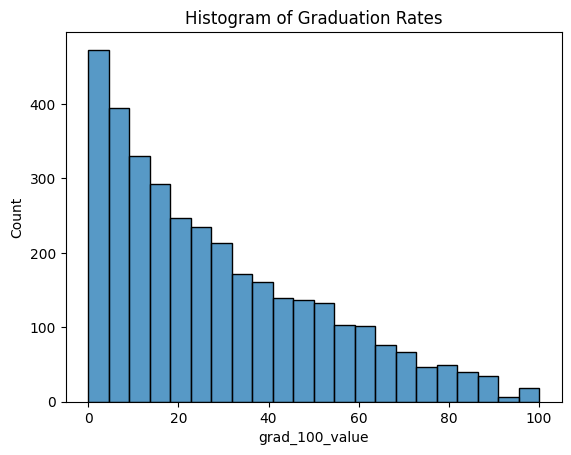

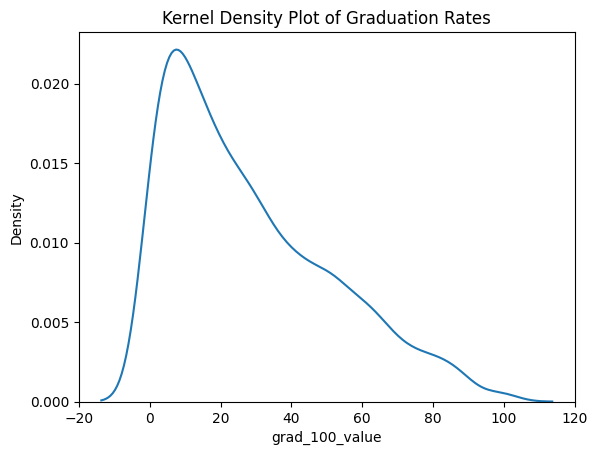

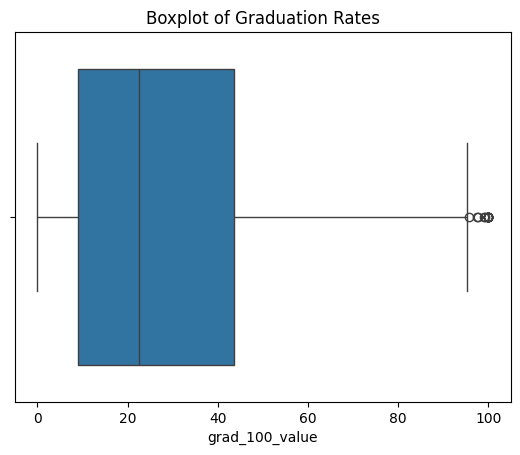



count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [15]:
# 4. Plot 'grad_100_value' graphs:

# Histogram
sns.histplot(df['grad_100_value'].dropna(), kde=False)
plt.title('Histogram of Graduation Rates')
plt.show()
print("\n")

# Kernel Density Plot
sns.kdeplot(df['grad_100_value'].dropna())
plt.title('Kernel Density Plot of Graduation Rates')
plt.show()
print("\n")

# Boxplot
sns.boxplot(x=df['grad_100_value'].dropna())
plt.title('Boxplot of Graduation Rates')
plt.show()
print("\n")

# Statistical Description
print(df['grad_100_value'].describe())

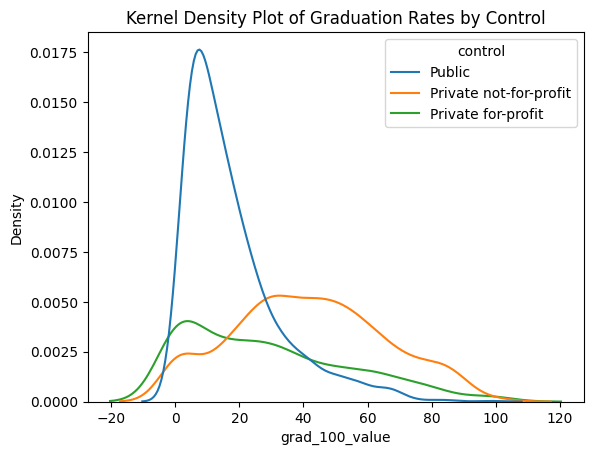

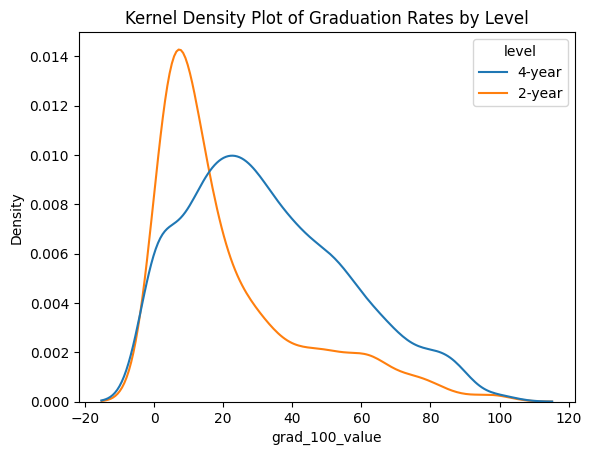



                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public     

In [23]:
# 5. Grouped kernel density plot of 'grad_100_value' by control and level:

# Grouped by control:
sns.kdeplot(data=df, x='grad_100_value', hue='control')
plt.title('Kernel Density Plot of Graduation Rates by Control')
plt.show()
print("\n")

# Grouped by level:
sns.kdeplot(data=df, x='grad_100_value', hue='level')
plt.title('Kernel Density Plot of Graduation Rates by Level')
plt.show()
print("\n")

# Grouped statistical descriptions:
print(df.groupby(['level', 'control'])['grad_100_value'].describe())

It appears that 4-year institutions have a better graduation rate than 2-year institutions. Additionally, it seems like private not-for-profit institutions have the best graduation rate out of private not-for-profit, private for-profit, and public institutions. This is interesting because we previously saw that a significant majority of private not-for-profit institutions are 4-year colleges. This means generally, private not-for-profit institutions are 4-year colleges that have a relatively high graduation rate.

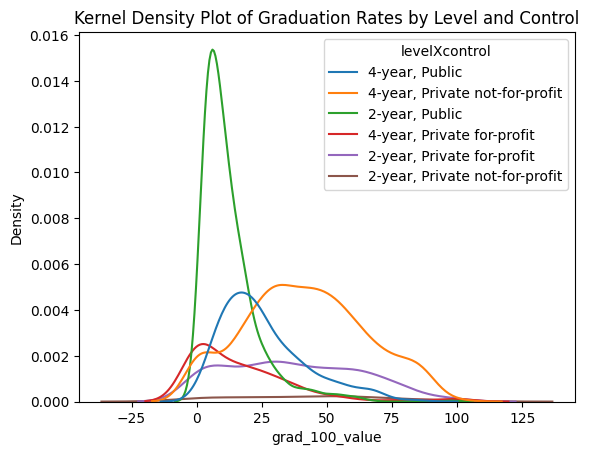

In [20]:
# 6. New variable 'levelXcontrol' and plotting grouped kernel density plot:

# Creating the new variable:
df['levelXcontrol']=df['level']+', '+df['control']

# Plotting grouped kernel density plot:
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol')
plt.title('Kernel Density Plot of Graduation Rates by Level and Control')
plt.show()

Aligning with our conclusions from the question above: 4-year, private not-for-profit institutions seem to have the highest graduation rate.

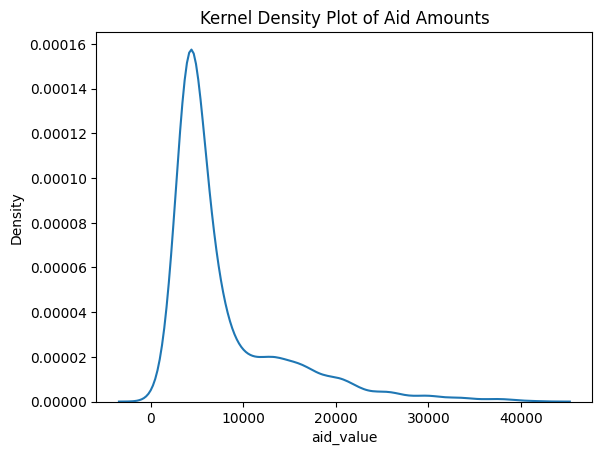

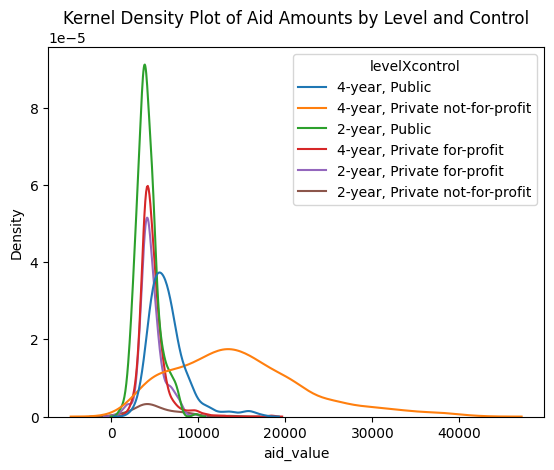



                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   436

In [26]:
# 7. Analyze 'aid_value' variable

# Kernel Density Plot:
sns.kdeplot(df['aid_value'].dropna())
plt.title('Kernel Density Plot of Aid Amounts')
plt.show()
print("\n")

# Grouped kernel density plot:
sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol')
plt.title('Kernel Density Plot of Aid Amounts by Level and Control')
plt.show()
print("\n")

# Grouped statistical descriptions:
print(df.groupby(['level', 'control'])['aid_value'].describe())

From above, we see that the kernel density plot has a normal-ish curve until it gets to aid amount = \$10000, which then it starts decreasing slower than it would if it kept following the curve it had. From our grouped kernel density plot, we can see that this is because the majority of 4-year, private not-for-profit institutions provide substantial aid (\$10000-\$20000) and thus skew the original curve, which is made up of all the other levelxcontrol institutions that provide minimal or no aid.

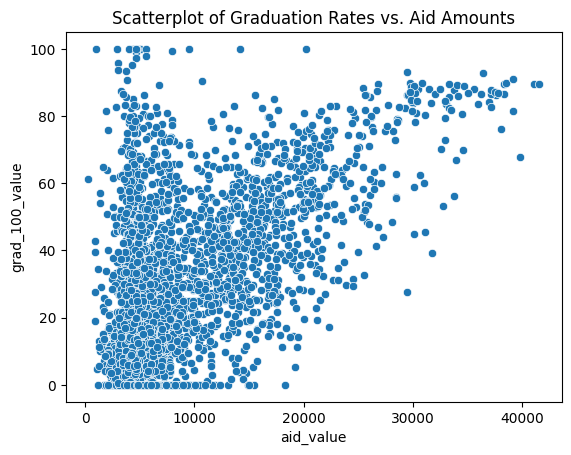

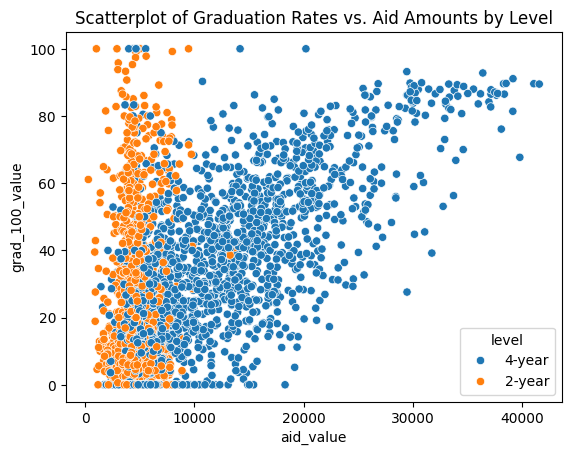

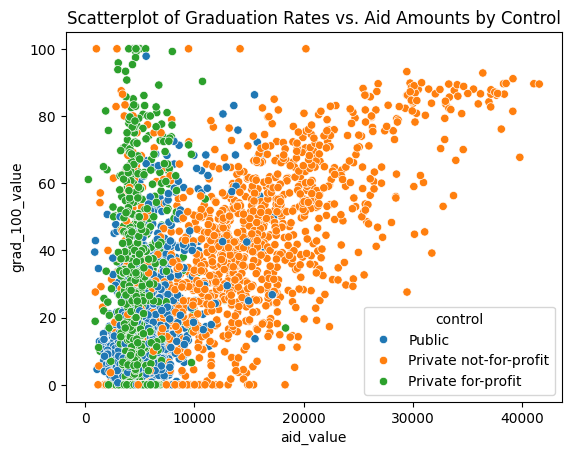

In [27]:
# 8. Scatterplot of 'grad_100_value' by 'aid_value'

# Basic scatterplot:
sns.scatterplot(x='aid_value', y='grad_100_value', data=df)
plt.title('Scatterplot of Graduation Rates vs. Aid Amounts')
plt.show()
print("\n")

# Scatterplot grouped by level:
sns.scatterplot(x='aid_value', y='grad_100_value', hue='level', data=df)
plt.title('Scatterplot of Graduation Rates vs. Aid Amounts by Level')
plt.show()
print("\n")

# Scatterplot grouped by control:
sns.scatterplot(x='aid_value', y='grad_100_value', hue='control', data=df)
plt.title('Scatterplot of Graduation Rates vs. Aid Amounts by Control')
plt.show()

From our first scatterplot, we can see that the majority of institutions provide minimal (\$0-\$10000) aid, and there are gradually less and less instutions that provide more aid. We can also see that the institutions who provide more aid tend to have a higher graduation rate.

From the scatterplot grouped by level, we can see that most, if not all, 2-year colleges provide minimal (\$0-\$10000) aid, while most 4-year colleges provide more aid than that (amounts span from ~\$10000 to ~\$40000).

From the scatterplot grouped by control, we can see that most private for-profit and public institutions (especially private for-profit) provide minimal (\$0-\$10000) aid, while most private not-for-profit institutions provide more aid than that (amounts span from ~\$10000 to ~\$40000).

This shows that aid seems to increase graduation rates for 4-year, not-for-profit institutions.

---

**KNN Q0.**
1. What is the difference between regression and classification?

Regression is used to predict continuous values, for example predicting a house price or the temperature tomorrow. Classification is used to predict values that are in categories or labels, for example deciding if an email is spam or not spam (yes or no). Both of these use the patterns and trends in data to make their predictions, but regression outputs numbers and classification outputs labels.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion table shows how many predictions a classification model got right and wrong. It separates out the predictions into true positives, true negatives, false positives, and false negatives. This helps us see where the model is making correct predictions or mistakes.

3. What does the SSE quantify about a particular model?

SSE is short for 'Sum of Squared Errors', and it is a measure of how far off a regression model's predictions are from the actual values in the dataset. It adds up all of the squared differences between each real value and its corresponding predicted value from our regression equation. The smaller the SSE, the closer the model's predictions are to the actual data.

4. What are overfitting and underfitting?

Overfitting is when a model takes into account too much from the training data (e.g. noise), and so it does extremely well on the training data (SSE close to 0) but poorly on any new data (large SSE) that doesn't have the same noise/variance. Underfitting is when the model is too general or simple and doesn't represent the trends in the data well, and so it does poorly on both the training and test data (large SSEs).

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

Splitting the data into training and testing sets helps us check to see if a model works well on data that it isn't trained on, since the model learns just from the training set. Choosing $k$ by evaluating accuracy or SSE on the test set helps prevent overfitting and makes sure the model isn’t just memorizing or perfectly following the training data without consideration to noise.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Prediction: Predicting a class label is simple and easy to just read off or interpret, but it doesn’t show how confident the model is. It gives us a black or white answer without consideration to any uncertainty.

Probability Distribution: Reporting a class label as a probability distribution shows the model’s confidence for each class, which is useful for detailed analysis, but it can also be harder to interpret and might be a waste of time to create and look at for simpler tasks.

---

**KNN Q1.**

This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [28]:
# Importing Data:
from google.colab import files
uploaded = files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


In [29]:
# Importing libraries:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [32]:
# 1. Load the dataset and preprocess

df = pd.read_csv('USA_cars_datasets.csv')

# Dropping all irrelevant columns:
df = df[['price', 'year', 'mileage']]

# Checking for NA/missing values:
print(df.isna().sum())  # makes sure there are no NAs
print("\n")

# Showing the first 5 rows and dataset dimensions
print(df.head())
print("\n")
print("Dataset dimensions:", df.shape)

price      0
year       0
mileage    0
dtype: int64


   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


Dataset dimensions: (2499, 3)


In [33]:
# 2. Normalize year and mileage

# Using MinMaxScaler:
scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

In [34]:
# 3. Split sample into training and evaluation/testing sets (80% training, 20% evaluation)

X = df[['year', 'mileage']]
y = df['price']

# Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # seed can be changed to check for variability

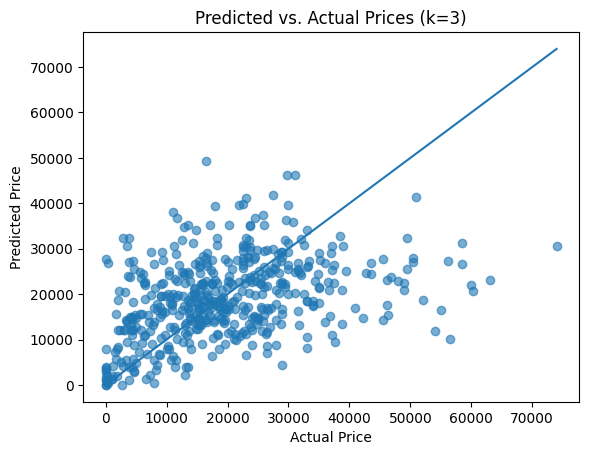

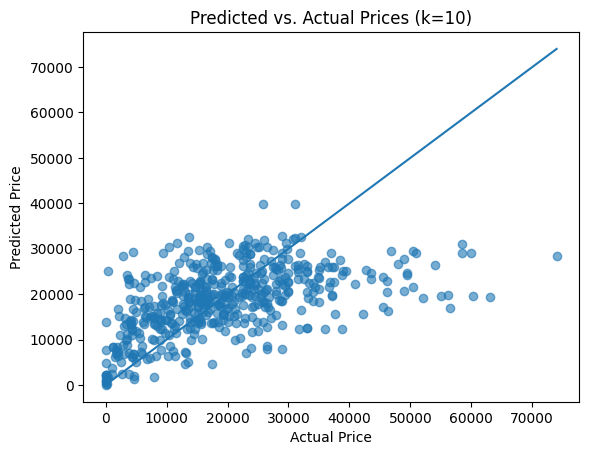

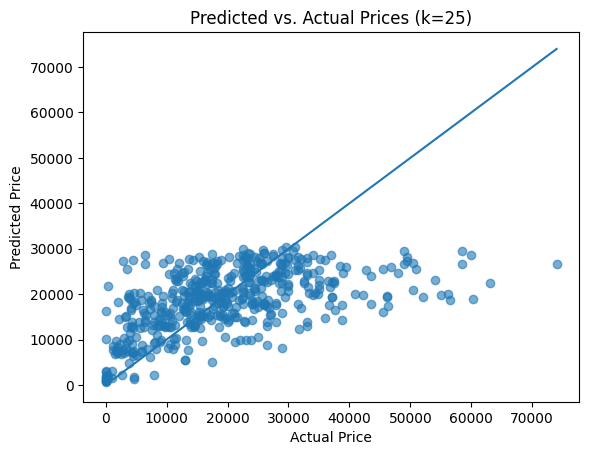

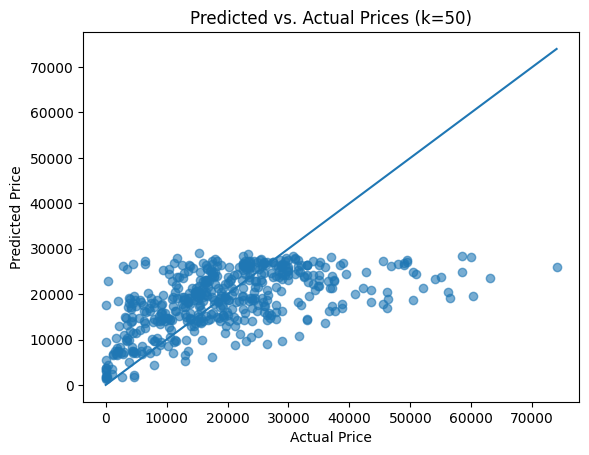

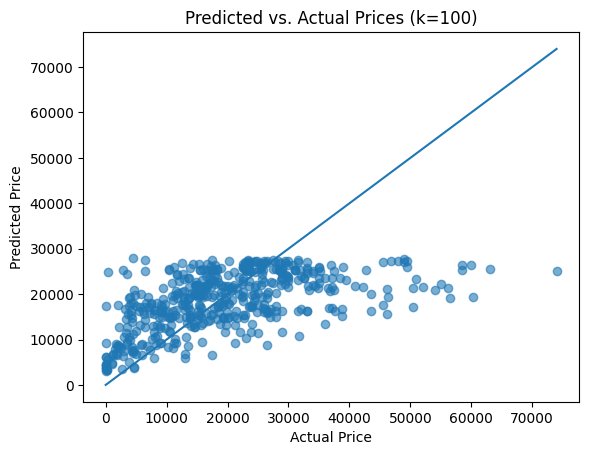

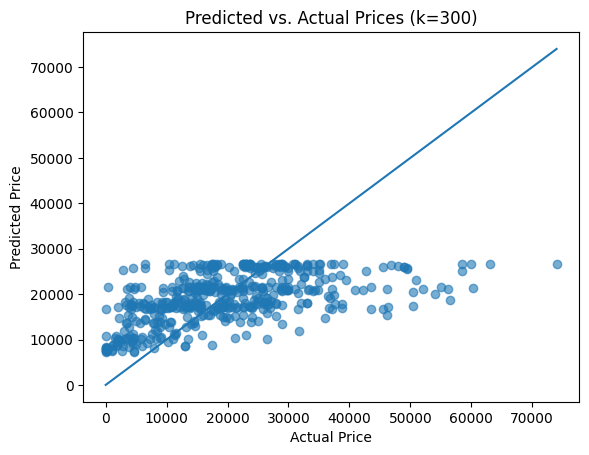

In [39]:
# 4a. Use KNN algorithm and predict price for different k values
# 4b. Calculate mean squared error and plot scatterplot for predicted vs actual values

k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:

    # KNN algorithm:
    knn = KNeighborsRegressor(n_neighbors=k)

    # Fitting the model on the training set:
    knn.fit(X_train, y_train)

    # Predicting values for the evaluation/testing set:
    y_pred = knn.predict(X_test)

    # Calculating the mean squared error:
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    # Plotting scatterplot of predicted vs actual values:
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
    plt.title(f'Predicted vs. Actual Prices (k={k})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()
    print("\n")

From above, I noticed that as k got larger, the predicted price was getting more and more limited to about <30000. This is because each value is predicted with many of its neighbors, and thus the prediction is more generalized and less sensitive to specific variations in the data.



when k=3, MSE=148065935.51955554
when k=10, MSE=117399126.10604002
when k=25, MSE=112576160.82390079
when k=50, MSE=110202549.3014296
when k=100, MSE=112253702.9700672
when k=300, MSE=114496092.28682345




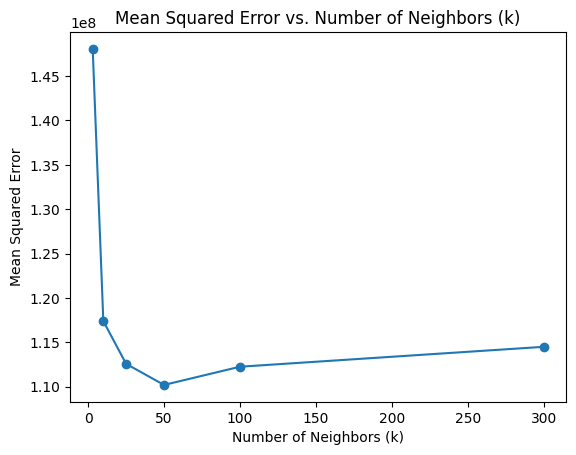



Optimal k: 50


In [46]:
# 5. Determine the optimal k

# Printing mean squared error results from above:
print("\n")
for k, mse in mse_results.items():
    print(f'when k={k}, MSE={mse}')
print("\n")

# Plotting MSE vs k to visualize:
plt.plot(k_values, list(mse_results.values()), marker='o')
plt.title('Mean Squared Error vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.show()
print("\n")

# Finding optimal k (lowest MSE):
optimal_k = min(mse_results, key=mse_results.get)
print(f'Optimal k: {optimal_k}')

### 6. Description of plots as k varied:

When k is small (e.g. k=3), there may be overfittting, because the predictions are made from only a couple of its neighbors and so any noise from each of these points would be heavily taken into account when calculating a prediction.

WHen k is large (e.g. k=300), there may be underfitting, because the predictions are now made with a lot of neighbors that might not be near at all, and so the prediction is too averaged.

This is why we find the optimal k (in this case, k=50) to make sure there isn't much overfitting or underfitting, and that minimizes the MSE.